In [2]:
from datetime import datetime
import numpy as np
import pandas as pd

## Data loading

In [3]:
df = pd.read_csv("trending.csv")

In [3]:
df

,publish_time,channel_id,title,description,thumbnail_url,thumbnail_width,thumbnail_height,channel_name,tags,category_id,...,caption,license_status,allowed_region,blocked_region,view,like,dislike,favorite,comment,trending_time
0,2021-02-05T09:00:34Z,UCEf_Bc-KVd7onSeifS3py9g,aespa 에스파 'Forever (약속)' MV,"aespa's new single ""Forever"" is out!\nListen a...",NaN,NaN,NaN,SMTOWN,NaN,10,...,True,True,NaN,NaN,7806846.0,857902.0,24078.0,0,94961.0,2021-02-07 05:46:51.832614+00:00
1,2021-02-04T15:54:08Z,UCYEa4_MC7OFjcWrO6SO-u8g,[FULL] Siapa di Balik Kudeta AHY? | Dua Sisi t...,"Jakarta, https://www.tvonenews.com - Ketua umu...",NaN,NaN,NaN,Indonesia Lawyers Club,"['tvone', 'tv one', 'tvonenews', 'indonesia la...",25,...,False,True,NaN,NaN,885038.0,6765.0,1263.0,0,6365.0,2021-02-07 05:46:51.832649+00:00
2,2021-02-06T03:00:22Z,UCu12RxQjRQyh79YBYvEDkOg,CABRIOLET CHALLENGE: TANTANGAN MENGGODA (7/12),Road Party Season 2: Cabriolet Challenge\n\nEp...,NaN,NaN,NaN,Motomobi,"['MotoMobi', 'Mobil', 'motor', 'review', 'indo...",2,...,False,True,NaN,NaN,889708.0,47895.0,532.0,0,8785.0,2021-02-07 05:46:51.832664+00:00
3,2021-02-05T20:26:08Z,UCCuzDCoI3EUOo_nhCj4noSw,With Windah Basudara & Hans,Join this channel to get access to perks:\nhtt...,NaN,NaN,NaN,yb,NaN,20,...,False,True,NaN,NaN,1006854.0,91973.0,3967.0,0,12957.0,2021-02-07 05:46:51.832678+00:00
4,2021-02-03T23:14:54Z,UC14UlmYlSNiQCBe9Eookf_A,🤯 LATE COMEBACK DRAMA! | HIGHLIGHTS | Granada ...,"With just two minutes to play, Barça looked to...",NaN,NaN,NaN,FC Barcelona,"['FC Barcelona', 'برشلونة،', 'Fútbol', 'FUTBOL...",17,...,False,True,NaN,NaN,6275035.0,218131.0,4289.0,0,12799.0,2021-02-07 05:46:51.832730+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14518,2021-05-18T14:59:58Z,UCzgxx_DM2Dcb9Y1spb9mUJA,"JIHYO PERFORMANCE PROJECT ""Crown (Camila Cabel...","JIHYO PERFORMANCE PROJECT ""Crown (Camila Cabel...",NaN,NaN,NaN,TWICE,"['TWICE', '트와이스', 'PerformanceProject', '퍼포먼스프...",10,...,False,False,NaN,"['CU', 'IR', 'KP', 'SY']",5718308.0,805799.0,10622.0,0,72774.0,2021-05-27 06:00:41.444658+00:00
14519,2021-05-24T09:48:50Z,UC8nOUvbfUqYRufAAFBFz72g,SEMALEMAN DALEM MOBIL DITENGAH KUBURAN BARENG ...,Download di sini ya : https://vt.tiktok.com/ZS...,NaN,NaN,NaN,RIYAN PEOTT,"['prank', 'pacar', 'borong perabotan', 'rumah ...",24,...,False,True,NaN,NaN,67791.0,5398.0,102.0,0,743.0,2021-05-27 06:00:41.444666+00:00
14520,2021-05-13T07:00:06Z,UCdpxBSzxXGz_J4K30YGvk_Q,HELENA LIM BUKA-BUKAAN SAMA BOY! CRAZY RICH PI...,-------------\nFind me on other Social Media p...,NaN,NaN,NaN,Boy William,"['boy william', 'nebengboy', 'dibalik pintu', ...",24,...,False,True,NaN,NaN,2424980.0,48838.0,1352.0,0,3034.0,2021-05-27 06:00:41.444673+00:00
14521,2021-05-21T10:29:06Z,UCwIzd032IQjvJ9larkdcwgg,SIAPA YANG GAMBARNYA LEBIH BAGUS? || Tantangan...,"Hai, sobat artistik!\n\nSelamat datang di duni...",NaN,NaN,NaN,123 GO! GOLD Indonesian,"['123', '123 go', '123go', '123 go gold', '123...",24,...,False,True,NaN,NaN,2014523.0,20507.0,2333.0,0,977.0,2021-05-27 06:00:41.444680+00:00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14523 entries, 0 to 14522
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   publish_time       14523 non-null  object 
 1   channel_id         14523 non-null  object 
 2   title              14523 non-null  object 
 3   description        14246 non-null  object 
 4   thumbnail_url      0 non-null      float64
 5   thumbnail_width    0 non-null      float64
 6   thumbnail_height   0 non-null      float64
 7   channel_name       14523 non-null  object 
 8   tags               12983 non-null  object 
 9   category_id        14523 non-null  int64  
 10  live_status        14523 non-null  object 
 11  local_title        14523 non-null  object 
 12  local_description  14246 non-null  object 
 13  duration           14523 non-null  object 
 14  dimension          14523 non-null  object 
 15  definition         14523 non-null  object 
 16  caption            145

In [12]:
df["tags"].head(10)

0                                                  NaN
1    ['tvone', 'tv one', 'tvonenews', 'indonesia la...
2    ['MotoMobi', 'Mobil', 'motor', 'review', 'indo...
3                                                  NaN
4    ['FC Barcelona', 'برشلونة،', 'Fútbol', 'FUTBOL...
5    ['KUY Entertainment', 'KUY Media', 'KUY', 'raf...
6    ['tvone', 'tvonenews', 'tv one', 'tvone live',...
7    ['arif muhammad', 'mak beti', 'ma beti', 'mama...
8      ['Picky Picks', 'Bimopd', 'Picky Picks Cringe']
9                                                  NaN
Name: tags, dtype: object

In [13]:
df["tags"].isnull().sum()

1540

In [25]:
df["view"].head(10)

0    7806846.0
1     885038.0
2     889708.0
3    1006854.0
4    6275035.0
5    1807529.0
6    1493171.0
7    1804541.0
8    1955271.0
9    8120183.0
Name: view, dtype: float64

In [17]:
df["view"].isnull().sum()

8

In [18]:
df["view"].unique()

array([7806846.,  885038.,  889708., ..., 2424980., 2014523.,  225558.])

In [20]:
df["view"].value_counts()

174888.0      2
1292241.0     2
130356.0      2
1136591.0     2
2699055.0     2
             ..
3889133.0     1
2578411.0     1
59697455.0    1
939510.0      1
22528.0       1
Name: view, Length: 14454, dtype: int64

In [26]:
df = pd.read_csv("trending.csv", na_values=["n/a", "na", "", "--"])
df

,publish_time,channel_id,title,description,thumbnail_url,thumbnail_width,thumbnail_height,channel_name,tags,category_id,...,caption,license_status,allowed_region,blocked_region,view,like,dislike,favorite,comment,trending_time
0,2021-02-05T09:00:34Z,UCEf_Bc-KVd7onSeifS3py9g,aespa 에스파 'Forever (약속)' MV,"aespa's new single ""Forever"" is out!\nListen a...",NaN,NaN,NaN,SMTOWN,NaN,10,...,True,True,NaN,NaN,7806846.0,857902.0,24078.0,0,94961.0,2021-02-07 05:46:51.832614+00:00
1,2021-02-04T15:54:08Z,UCYEa4_MC7OFjcWrO6SO-u8g,[FULL] Siapa di Balik Kudeta AHY? | Dua Sisi t...,"Jakarta, https://www.tvonenews.com - Ketua umu...",NaN,NaN,NaN,Indonesia Lawyers Club,"['tvone', 'tv one', 'tvonenews', 'indonesia la...",25,...,False,True,NaN,NaN,885038.0,6765.0,1263.0,0,6365.0,2021-02-07 05:46:51.832649+00:00
2,2021-02-06T03:00:22Z,UCu12RxQjRQyh79YBYvEDkOg,CABRIOLET CHALLENGE: TANTANGAN MENGGODA (7/12),Road Party Season 2: Cabriolet Challenge\n\nEp...,NaN,NaN,NaN,Motomobi,"['MotoMobi', 'Mobil', 'motor', 'review', 'indo...",2,...,False,True,NaN,NaN,889708.0,47895.0,532.0,0,8785.0,2021-02-07 05:46:51.832664+00:00
3,2021-02-05T20:26:08Z,UCCuzDCoI3EUOo_nhCj4noSw,With Windah Basudara & Hans,Join this channel to get access to perks:\nhtt...,NaN,NaN,NaN,yb,NaN,20,...,False,True,NaN,NaN,1006854.0,91973.0,3967.0,0,12957.0,2021-02-07 05:46:51.832678+00:00
4,2021-02-03T23:14:54Z,UC14UlmYlSNiQCBe9Eookf_A,🤯 LATE COMEBACK DRAMA! | HIGHLIGHTS | Granada ...,"With just two minutes to play, Barça looked to...",NaN,NaN,NaN,FC Barcelona,"['FC Barcelona', 'برشلونة،', 'Fútbol', 'FUTBOL...",17,...,False,True,NaN,NaN,6275035.0,218131.0,4289.0,0,12799.0,2021-02-07 05:46:51.832730+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14518,2021-05-18T14:59:58Z,UCzgxx_DM2Dcb9Y1spb9mUJA,"JIHYO PERFORMANCE PROJECT ""Crown (Camila Cabel...","JIHYO PERFORMANCE PROJECT ""Crown (Camila Cabel...",NaN,NaN,NaN,TWICE,"['TWICE', '트와이스', 'PerformanceProject', '퍼포먼스프...",10,...,False,False,NaN,"['CU', 'IR', 'KP', 'SY']",5718308.0,805799.0,10622.0,0,72774.0,2021-05-27 06:00:41.444658+00:00
14519,2021-05-24T09:48:50Z,UC8nOUvbfUqYRufAAFBFz72g,SEMALEMAN DALEM MOBIL DITENGAH KUBURAN BARENG ...,Download di sini ya : https://vt.tiktok.com/ZS...,NaN,NaN,NaN,RIYAN PEOTT,"['prank', 'pacar', 'borong perabotan', 'rumah ...",24,...,False,True,NaN,NaN,67791.0,5398.0,102.0,0,743.0,2021-05-27 06:00:41.444666+00:00
14520,2021-05-13T07:00:06Z,UCdpxBSzxXGz_J4K30YGvk_Q,HELENA LIM BUKA-BUKAAN SAMA BOY! CRAZY RICH PI...,-------------\nFind me on other Social Media p...,NaN,NaN,NaN,Boy William,"['boy william', 'nebengboy', 'dibalik pintu', ...",24,...,False,True,NaN,NaN,2424980.0,48838.0,1352.0,0,3034.0,2021-05-27 06:00:41.444673+00:00
14521,2021-05-21T10:29:06Z,UCwIzd032IQjvJ9larkdcwgg,SIAPA YANG GAMBARNYA LEBIH BAGUS? || Tantangan...,"Hai, sobat artistik!\n\nSelamat datang di duni...",NaN,NaN,NaN,123 GO! GOLD Indonesian,"['123', '123 go', '123go', '123 go gold', '123...",24,...,False,True,NaN,NaN,2014523.0,20507.0,2333.0,0,977.0,2021-05-27 06:00:41.444680+00:00


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14523 entries, 0 to 14522
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   publish_time       14523 non-null  object 
 1   channel_id         14523 non-null  object 
 2   title              14523 non-null  object 
 3   description        14246 non-null  object 
 4   thumbnail_url      0 non-null      float64
 5   thumbnail_width    0 non-null      float64
 6   thumbnail_height   0 non-null      float64
 7   channel_name       14523 non-null  object 
 8   tags               12983 non-null  object 
 9   category_id        14523 non-null  int64  
 10  live_status        14523 non-null  object 
 11  local_title        14523 non-null  object 
 12  local_description  14246 non-null  object 
 13  duration           14523 non-null  object 
 14  dimension          14523 non-null  object 
 15  definition         14523 non-null  object 
 16  caption            145

In [29]:
summary_cols = ["description", "tags", "local_description", "view", "like", "dislike", "comment"]
df_summary = df[summary_cols].copy()
df_summary

,description,tags,local_description,view,like,dislike,comment
0,"aespa's new single ""Forever"" is out!\nListen a...",NaN,"aespa's new single ""Forever"" is out!\nListen a...",7806846.0,857902.0,24078.0,94961.0
1,"Jakarta, https://www.tvonenews.com - Ketua umu...","['tvone', 'tv one', 'tvonenews', 'indonesia la...","Jakarta, https://www.tvonenews.com - Ketua umu...",885038.0,6765.0,1263.0,6365.0
2,Road Party Season 2: Cabriolet Challenge\n\nEp...,"['MotoMobi', 'Mobil', 'motor', 'review', 'indo...",Road Party Season 2: Cabriolet Challenge\n\nEp...,889708.0,47895.0,532.0,8785.0
3,Join this channel to get access to perks:\nhtt...,NaN,Join this channel to get access to perks:\nhtt...,1006854.0,91973.0,3967.0,12957.0
4,"With just two minutes to play, Barça looked to...","['FC Barcelona', 'برشلونة،', 'Fútbol', 'FUTBOL...","With just two minutes to play, Barça looked to...",6275035.0,218131.0,4289.0,12799.0
...,...,...,...,...,...,...,...
14518,"JIHYO PERFORMANCE PROJECT ""Crown (Camila Cabel...","['TWICE', '트와이스', 'PerformanceProject', '퍼포먼스프...","JIHYO PERFORMANCE PROJECT ""Crown (Camila Cabel...",5718308.0,805799.0,10622.0,72774.0
14519,Download di sini ya : https://vt.tiktok.com/ZS...,"['prank', 'pacar', 'borong perabotan', 'rumah ...",Download di sini ya : https://vt.tiktok.com/ZS...,67791.0,5398.0,102.0,743.0
14520,-------------\nFind me on other Social Media p...,"['boy william', 'nebengboy', 'dibalik pintu', ...",-------------\nFind me on other Social Media p...,2424980.0,48838.0,1352.0,3034.0
14521,"Hai, sobat artistik!\n\nSelamat datang di duni...","['123', '123 go', '123go', '123 go gold', '123...","Hai, sobat artistik!\n\nSelamat datang di duni...",2014523.0,20507.0,2333.0,977.0


In [30]:
df["tags"].isna()

0         True
1        False
2        False
3         True
4        False
         ...  
14518    False
14519    False
14520    False
14521    False
14522     True
Name: tags, Length: 14523, dtype: bool

In [31]:
df["tags"].unique()

array([nan,
       "['tvone', 'tv one', 'tvonenews', 'indonesia lawyers club', 'ilc', 'indonesia lawyers club tvone', 'ilc tvone', 'karni ilyas', 'ilc tv one', 'debat', 'dialog', 'ilc terbaru', 'indonesia lawyers club terbaru', 'ilc tadi malam', 'ilc terbaru tadi malam', 'tvonenews.com', 'berita viral', 'berita terbaru', 'berita terkini', 'tvone live']",
       "['MotoMobi', 'Mobil', 'motor', 'review', 'indonesia', 'moto', 'mobi', 'autonetmagz', 'otodriver', '2018', '2019', '2020', '2021', 'cabriolet challenge', 'road party', 'bali', 'cantik bali', 'arief muhammad', 'fitra eri', 'ridwan hanif', 'bmw', 'mazda', 'mini', 'honda', 'andre taulany', 'gambar', 'picasso', 'deddy corbuzier', 'rans entertainment', 'ms glow', 'juragan 99', 'realfood']",
       ...,
       "['Tribunnews', 'Tribunmedan', 'Seorang Ibu Menipu Penjual Gorengan', 'Ngaku Uang Kembalian Kurang']",
       "['The Dream Craft Indonesia', 'Survival Indonesia', 'indonesia', 'Kocak', 'Lucu', 'MCPC', 'MCPE', 'Adventure', 'Gamin

In [5]:
df.loc[0, "tags"]

nan

In [11]:
df["view"].unique()


array([7806846.,  885038.,  889708., ..., 2424980., 2014523.,  225558.])

In [12]:
df["view"].value_counts()

174888.0      2
1292241.0     2
130356.0      2
1136591.0     2
2699055.0     2
             ..
3889133.0     1
2578411.0     1
59697455.0    1
939510.0      1
22528.0       1
Name: view, Length: 14454, dtype: int64

In [22]:
df_nan = df["view"] == np.nan
df_nan

0        False
1        False
2        False
3        False
4        False
         ...  
14518    False
14519    False
14520    False
14521    False
14522    False
Name: view, Length: 14523, dtype: bool

In [26]:
df.loc[0:80, "view"] == np.nan

0     False
1     False
2     False
3     False
4     False
      ...  
76    False
77    False
78    False
79    False
80    False
Name: view, Length: 81, dtype: bool

In [27]:
nan_rows = df[df['view'].isnull()]
nan_rows

,publish_time,channel_id,title,description,thumbnail_url,thumbnail_width,thumbnail_height,channel_name,tags,category_id,...,caption,license_status,allowed_region,blocked_region,view,like,dislike,favorite,comment,trending_time
9782,2021-04-17T14:56:38Z,UCTkC3Jt91QkqNAE4FGWkEIQ,The Funeral of The Duke of Edinburgh,The Funeral procession and service for His Roy...,NaN,NaN,NaN,The Royal Family,NaN,22,...,False,False,NaN,NaN,NaN,NaN,NaN,0,NaN,2021-04-18 07:01:28.975782+00:00
9985,2021-04-17T14:56:38Z,UCTkC3Jt91QkqNAE4FGWkEIQ,The Funeral of The Duke of Edinburgh,The Funeral procession and service for His Roy...,NaN,NaN,NaN,The Royal Family,NaN,22,...,False,False,NaN,NaN,NaN,NaN,NaN,0,NaN,2021-04-19 03:38:15.828241+00:00
10349,2021-04-21T11:00:14Z,UCdq61m8s_48EhJ5OM_MCeGw,Earth Day 2021 Doodle,This year’s annual Earth Day Doodle highlights...,NaN,NaN,NaN,GoogleDoodles,NaN,1,...,True,False,NaN,NaN,NaN,NaN,NaN,0,NaN,2021-04-22 13:55:37.234331+00:00
10551,2021-04-21T11:00:14Z,UCdq61m8s_48EhJ5OM_MCeGw,Earth Day 2021 Doodle,This year’s annual Earth Day Doodle highlights...,NaN,NaN,NaN,GoogleDoodles,NaN,1,...,True,False,NaN,NaN,NaN,NaN,NaN,0,NaN,2021-04-23 08:59:21.827545+00:00
10756,2021-04-21T11:00:14Z,UCdq61m8s_48EhJ5OM_MCeGw,Earth Day 2021 Doodle,This year’s annual Earth Day Doodle highlights...,NaN,NaN,NaN,GoogleDoodles,NaN,1,...,True,False,NaN,NaN,NaN,NaN,NaN,0,NaN,2021-04-23 13:41:20.453432+00:00
10969,2021-04-21T11:00:14Z,UCdq61m8s_48EhJ5OM_MCeGw,Earth Day 2021 Doodle,This year’s annual Earth Day Doodle highlights...,NaN,NaN,NaN,GoogleDoodles,NaN,1,...,True,False,NaN,NaN,NaN,NaN,NaN,0,NaN,2021-04-24 16:45:55.011646+00:00
11121,2021-04-21T11:00:14Z,UCdq61m8s_48EhJ5OM_MCeGw,Earth Day 2021 Doodle,This year’s annual Earth Day Doodle highlights...,NaN,NaN,NaN,GoogleDoodles,NaN,1,...,True,False,NaN,NaN,NaN,NaN,NaN,0,NaN,2021-04-25 15:09:17.995828+00:00
11340,2021-04-21T11:00:14Z,UCdq61m8s_48EhJ5OM_MCeGw,Earth Day 2021 Doodle,This year’s annual Earth Day Doodle highlights...,NaN,NaN,NaN,GoogleDoodles,NaN,1,...,True,False,NaN,NaN,NaN,NaN,NaN,0,NaN,2021-04-26 15:22:22.287190+00:00


In [29]:
df.view[9782]

nan

In [30]:
for idx, row in enumerate(df.view):
    if not isinstance(row, str):
        continue
    try:
        int(float(row))
        # df.loc[idx, "NUM_BATH"] = int(float(row))
    except:
        df.loc[idx, "view"] = np.nan

df

,publish_time,channel_id,title,description,thumbnail_url,thumbnail_width,thumbnail_height,channel_name,tags,category_id,...,caption,license_status,allowed_region,blocked_region,view,like,dislike,favorite,comment,trending_time
0,2021-02-05T09:00:34Z,UCEf_Bc-KVd7onSeifS3py9g,aespa 에스파 'Forever (약속)' MV,"aespa's new single ""Forever"" is out!\nListen a...",NaN,NaN,NaN,SMTOWN,NaN,10,...,True,True,NaN,NaN,7806846.0,857902.0,24078.0,0,94961.0,2021-02-07 05:46:51.832614+00:00
1,2021-02-04T15:54:08Z,UCYEa4_MC7OFjcWrO6SO-u8g,[FULL] Siapa di Balik Kudeta AHY? | Dua Sisi t...,"Jakarta, https://www.tvonenews.com - Ketua umu...",NaN,NaN,NaN,Indonesia Lawyers Club,"['tvone', 'tv one', 'tvonenews', 'indonesia la...",25,...,False,True,NaN,NaN,885038.0,6765.0,1263.0,0,6365.0,2021-02-07 05:46:51.832649+00:00
2,2021-02-06T03:00:22Z,UCu12RxQjRQyh79YBYvEDkOg,CABRIOLET CHALLENGE: TANTANGAN MENGGODA (7/12),Road Party Season 2: Cabriolet Challenge\n\nEp...,NaN,NaN,NaN,Motomobi,"['MotoMobi', 'Mobil', 'motor', 'review', 'indo...",2,...,False,True,NaN,NaN,889708.0,47895.0,532.0,0,8785.0,2021-02-07 05:46:51.832664+00:00
3,2021-02-05T20:26:08Z,UCCuzDCoI3EUOo_nhCj4noSw,With Windah Basudara & Hans,Join this channel to get access to perks:\nhtt...,NaN,NaN,NaN,yb,NaN,20,...,False,True,NaN,NaN,1006854.0,91973.0,3967.0,0,12957.0,2021-02-07 05:46:51.832678+00:00
4,2021-02-03T23:14:54Z,UC14UlmYlSNiQCBe9Eookf_A,🤯 LATE COMEBACK DRAMA! | HIGHLIGHTS | Granada ...,"With just two minutes to play, Barça looked to...",NaN,NaN,NaN,FC Barcelona,"['FC Barcelona', 'برشلونة،', 'Fútbol', 'FUTBOL...",17,...,False,True,NaN,NaN,6275035.0,218131.0,4289.0,0,12799.0,2021-02-07 05:46:51.832730+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14518,2021-05-18T14:59:58Z,UCzgxx_DM2Dcb9Y1spb9mUJA,"JIHYO PERFORMANCE PROJECT ""Crown (Camila Cabel...","JIHYO PERFORMANCE PROJECT ""Crown (Camila Cabel...",NaN,NaN,NaN,TWICE,"['TWICE', '트와이스', 'PerformanceProject', '퍼포먼스프...",10,...,False,False,NaN,"['CU', 'IR', 'KP', 'SY']",5718308.0,805799.0,10622.0,0,72774.0,2021-05-27 06:00:41.444658+00:00
14519,2021-05-24T09:48:50Z,UC8nOUvbfUqYRufAAFBFz72g,SEMALEMAN DALEM MOBIL DITENGAH KUBURAN BARENG ...,Download di sini ya : https://vt.tiktok.com/ZS...,NaN,NaN,NaN,RIYAN PEOTT,"['prank', 'pacar', 'borong perabotan', 'rumah ...",24,...,False,True,NaN,NaN,67791.0,5398.0,102.0,0,743.0,2021-05-27 06:00:41.444666+00:00
14520,2021-05-13T07:00:06Z,UCdpxBSzxXGz_J4K30YGvk_Q,HELENA LIM BUKA-BUKAAN SAMA BOY! CRAZY RICH PI...,-------------\nFind me on other Social Media p...,NaN,NaN,NaN,Boy William,"['boy william', 'nebengboy', 'dibalik pintu', ...",24,...,False,True,NaN,NaN,2424980.0,48838.0,1352.0,0,3034.0,2021-05-27 06:00:41.444673+00:00
14521,2021-05-21T10:29:06Z,UCwIzd032IQjvJ9larkdcwgg,SIAPA YANG GAMBARNYA LEBIH BAGUS? || Tantangan...,"Hai, sobat artistik!\n\nSelamat datang di duni...",NaN,NaN,NaN,123 GO! GOLD Indonesian,"['123', '123 go', '123go', '123 go gold', '123...",24,...,False,True,NaN,NaN,2014523.0,20507.0,2333.0,0,977.0,2021-05-27 06:00:41.444680+00:00


In [31]:
df["view"].fillna(1500, inplace=True)

In [32]:
df.loc[9782, "view"]

1500.0

In [36]:
df.loc[9780:9785, "view"]

9780     115735.0
9781     360728.0
9782       1500.0
9783    2597896.0
9784     187238.0
9785     469161.0
Name: view, dtype: float64

In [35]:
df.loc[9985, "view"]

1500.0

In [37]:
df.loc[9780:9785]

,publish_time,channel_id,title,description,thumbnail_url,thumbnail_width,thumbnail_height,channel_name,tags,category_id,...,caption,license_status,allowed_region,blocked_region,view,like,dislike,favorite,comment,trending_time
9780,2021-04-17T10:00:09Z,UCD647QRWm5P34V34Aljt1cw,Raffi Ahmad Dan Rizky Billar Adu Rayu Cewek! |...,Raffi ahmad ketemu saingan baru nih buat ngera...,NaN,NaN,NaN,ANTV Klik,"['ANTV', 'Sahurnya Pesbukers', 'Komedi', 'Raff...",24,...,False,True,NaN,NaN,115735.0,6249.0,149.0,0,1307.0,2021-04-18 07:01:28.975763+00:00
9781,2021-04-15T09:00:16Z,UCLZDxzPCTxEXgWI5k8QWlvw,Virgoun – Orang Yang Sama (OST. Aku Dan Mesin ...,Lagu #OrangYangSama menjadi inspirasi dan orig...,NaN,NaN,NaN,Virgoun,"['virgoun', 'surat cinta untuk starla', 'bukti...",10,...,False,True,NaN,NaN,360728.0,26266.0,159.0,0,2257.0,2021-04-18 07:01:28.975772+00:00
9782,2021-04-17T14:56:38Z,UCTkC3Jt91QkqNAE4FGWkEIQ,The Funeral of The Duke of Edinburgh,The Funeral procession and service for His Roy...,NaN,NaN,NaN,The Royal Family,NaN,22,...,False,False,NaN,NaN,1500.0,NaN,NaN,0,NaN,2021-04-18 07:01:28.975782+00:00
9783,2021-04-08T15:39:42Z,UCC6SejZDisqDrBmc37dVE1A,Arsy & Ashanty - Snowman | Grand Final | The V...,Viral!!! Penampilan Arsy Dengan Lagu Snowman D...,NaN,NaN,NaN,The Voice Kids Indonesia GTV,"['Globaltvseru', 'GTV', 'GlobalTVIndonesia', '...",24,...,False,True,NaN,NaN,2597896.0,104318.0,2769.0,0,0.0,2021-04-18 07:01:28.975790+00:00
9784,2021-04-16T10:00:08Z,UCMP34qPqCuw2pZAcqym9csw,BOBO & CASTEL BATAL PUASA || KONTRAKAN REMPONG...,Bobo Castle gak puasa\nDari kami si pencinta W...,NaN,NaN,NaN,Lucu Lucu Video,"['kontrakan rempong', 'kompilasi kontrakan rem...",24,...,False,True,NaN,NaN,187238.0,2936.0,268.0,0,110.0,2021-04-18 07:01:28.975798+00:00
9785,2021-04-12T19:22:12Z,UCtj5-NSHA5-FFUbXwx2oDDw,HAFIZ INDONESIA 2021 - Mengenang Alm. Syekh Al...,"Assalamu’alaikum, Sahabat Qurani. Alhamdulilla...",NaN,NaN,NaN,Hafiz Indonesia,"['Hafiz', 'Hafiz Indonesia', 'Al-Quran', 'Isla...",24,...,False,True,NaN,NaN,469161.0,30986.0,170.0,0,926.0,2021-04-18 07:01:28.975808+00:00


In [38]:
df["like"].fillna(1000, inplace=True)

In [39]:
df.loc[9782, "like"]

1000.0

In [40]:
df.loc[9780:9785]

,publish_time,channel_id,title,description,thumbnail_url,thumbnail_width,thumbnail_height,channel_name,tags,category_id,...,caption,license_status,allowed_region,blocked_region,view,like,dislike,favorite,comment,trending_time
9780,2021-04-17T10:00:09Z,UCD647QRWm5P34V34Aljt1cw,Raffi Ahmad Dan Rizky Billar Adu Rayu Cewek! |...,Raffi ahmad ketemu saingan baru nih buat ngera...,NaN,NaN,NaN,ANTV Klik,"['ANTV', 'Sahurnya Pesbukers', 'Komedi', 'Raff...",24,...,False,True,NaN,NaN,115735.0,6249.0,149.0,0,1307.0,2021-04-18 07:01:28.975763+00:00
9781,2021-04-15T09:00:16Z,UCLZDxzPCTxEXgWI5k8QWlvw,Virgoun – Orang Yang Sama (OST. Aku Dan Mesin ...,Lagu #OrangYangSama menjadi inspirasi dan orig...,NaN,NaN,NaN,Virgoun,"['virgoun', 'surat cinta untuk starla', 'bukti...",10,...,False,True,NaN,NaN,360728.0,26266.0,159.0,0,2257.0,2021-04-18 07:01:28.975772+00:00
9782,2021-04-17T14:56:38Z,UCTkC3Jt91QkqNAE4FGWkEIQ,The Funeral of The Duke of Edinburgh,The Funeral procession and service for His Roy...,NaN,NaN,NaN,The Royal Family,NaN,22,...,False,False,NaN,NaN,1500.0,1000.0,NaN,0,NaN,2021-04-18 07:01:28.975782+00:00
9783,2021-04-08T15:39:42Z,UCC6SejZDisqDrBmc37dVE1A,Arsy & Ashanty - Snowman | Grand Final | The V...,Viral!!! Penampilan Arsy Dengan Lagu Snowman D...,NaN,NaN,NaN,The Voice Kids Indonesia GTV,"['Globaltvseru', 'GTV', 'GlobalTVIndonesia', '...",24,...,False,True,NaN,NaN,2597896.0,104318.0,2769.0,0,0.0,2021-04-18 07:01:28.975790+00:00
9784,2021-04-16T10:00:08Z,UCMP34qPqCuw2pZAcqym9csw,BOBO & CASTEL BATAL PUASA || KONTRAKAN REMPONG...,Bobo Castle gak puasa\nDari kami si pencinta W...,NaN,NaN,NaN,Lucu Lucu Video,"['kontrakan rempong', 'kompilasi kontrakan rem...",24,...,False,True,NaN,NaN,187238.0,2936.0,268.0,0,110.0,2021-04-18 07:01:28.975798+00:00
9785,2021-04-12T19:22:12Z,UCtj5-NSHA5-FFUbXwx2oDDw,HAFIZ INDONESIA 2021 - Mengenang Alm. Syekh Al...,"Assalamu’alaikum, Sahabat Qurani. Alhamdulilla...",NaN,NaN,NaN,Hafiz Indonesia,"['Hafiz', 'Hafiz Indonesia', 'Al-Quran', 'Isla...",24,...,False,True,NaN,NaN,469161.0,30986.0,170.0,0,926.0,2021-04-18 07:01:28.975808+00:00


In [41]:
df["dislike"].fillna(300, inplace=True)

In [43]:
df.loc[9782, "dislike"]

300.0

In [44]:
df.loc[9780:9785]

,publish_time,channel_id,title,description,thumbnail_url,thumbnail_width,thumbnail_height,channel_name,tags,category_id,...,caption,license_status,allowed_region,blocked_region,view,like,dislike,favorite,comment,trending_time
9780,2021-04-17T10:00:09Z,UCD647QRWm5P34V34Aljt1cw,Raffi Ahmad Dan Rizky Billar Adu Rayu Cewek! |...,Raffi ahmad ketemu saingan baru nih buat ngera...,NaN,NaN,NaN,ANTV Klik,"['ANTV', 'Sahurnya Pesbukers', 'Komedi', 'Raff...",24,...,False,True,NaN,NaN,115735.0,6249.0,149.0,0,1307.0,2021-04-18 07:01:28.975763+00:00
9781,2021-04-15T09:00:16Z,UCLZDxzPCTxEXgWI5k8QWlvw,Virgoun – Orang Yang Sama (OST. Aku Dan Mesin ...,Lagu #OrangYangSama menjadi inspirasi dan orig...,NaN,NaN,NaN,Virgoun,"['virgoun', 'surat cinta untuk starla', 'bukti...",10,...,False,True,NaN,NaN,360728.0,26266.0,159.0,0,2257.0,2021-04-18 07:01:28.975772+00:00
9782,2021-04-17T14:56:38Z,UCTkC3Jt91QkqNAE4FGWkEIQ,The Funeral of The Duke of Edinburgh,The Funeral procession and service for His Roy...,NaN,NaN,NaN,The Royal Family,NaN,22,...,False,False,NaN,NaN,1500.0,1000.0,300.0,0,NaN,2021-04-18 07:01:28.975782+00:00
9783,2021-04-08T15:39:42Z,UCC6SejZDisqDrBmc37dVE1A,Arsy & Ashanty - Snowman | Grand Final | The V...,Viral!!! Penampilan Arsy Dengan Lagu Snowman D...,NaN,NaN,NaN,The Voice Kids Indonesia GTV,"['Globaltvseru', 'GTV', 'GlobalTVIndonesia', '...",24,...,False,True,NaN,NaN,2597896.0,104318.0,2769.0,0,0.0,2021-04-18 07:01:28.975790+00:00
9784,2021-04-16T10:00:08Z,UCMP34qPqCuw2pZAcqym9csw,BOBO & CASTEL BATAL PUASA || KONTRAKAN REMPONG...,Bobo Castle gak puasa\nDari kami si pencinta W...,NaN,NaN,NaN,Lucu Lucu Video,"['kontrakan rempong', 'kompilasi kontrakan rem...",24,...,False,True,NaN,NaN,187238.0,2936.0,268.0,0,110.0,2021-04-18 07:01:28.975798+00:00
9785,2021-04-12T19:22:12Z,UCtj5-NSHA5-FFUbXwx2oDDw,HAFIZ INDONESIA 2021 - Mengenang Alm. Syekh Al...,"Assalamu’alaikum, Sahabat Qurani. Alhamdulilla...",NaN,NaN,NaN,Hafiz Indonesia,"['Hafiz', 'Hafiz Indonesia', 'Al-Quran', 'Isla...",24,...,False,True,NaN,NaN,469161.0,30986.0,170.0,0,926.0,2021-04-18 07:01:28.975808+00:00


In [47]:
df["comment"].fillna(100, inplace=True)

In [48]:
df.loc[9780:9785]

,publish_time,channel_id,title,description,thumbnail_url,thumbnail_width,thumbnail_height,channel_name,tags,category_id,...,caption,license_status,allowed_region,blocked_region,view,like,dislike,favorite,comment,trending_time
9780,2021-04-17T10:00:09Z,UCD647QRWm5P34V34Aljt1cw,Raffi Ahmad Dan Rizky Billar Adu Rayu Cewek! |...,Raffi ahmad ketemu saingan baru nih buat ngera...,NaN,NaN,NaN,ANTV Klik,"['ANTV', 'Sahurnya Pesbukers', 'Komedi', 'Raff...",24,...,False,True,NaN,NaN,115735.0,6249.0,149.0,0,1307.0,2021-04-18 07:01:28.975763+00:00
9781,2021-04-15T09:00:16Z,UCLZDxzPCTxEXgWI5k8QWlvw,Virgoun – Orang Yang Sama (OST. Aku Dan Mesin ...,Lagu #OrangYangSama menjadi inspirasi dan orig...,NaN,NaN,NaN,Virgoun,"['virgoun', 'surat cinta untuk starla', 'bukti...",10,...,False,True,NaN,NaN,360728.0,26266.0,159.0,0,2257.0,2021-04-18 07:01:28.975772+00:00
9782,2021-04-17T14:56:38Z,UCTkC3Jt91QkqNAE4FGWkEIQ,The Funeral of The Duke of Edinburgh,The Funeral procession and service for His Roy...,NaN,NaN,NaN,The Royal Family,NaN,22,...,False,False,NaN,NaN,1500.0,1000.0,300.0,0,100.0,2021-04-18 07:01:28.975782+00:00
9783,2021-04-08T15:39:42Z,UCC6SejZDisqDrBmc37dVE1A,Arsy & Ashanty - Snowman | Grand Final | The V...,Viral!!! Penampilan Arsy Dengan Lagu Snowman D...,NaN,NaN,NaN,The Voice Kids Indonesia GTV,"['Globaltvseru', 'GTV', 'GlobalTVIndonesia', '...",24,...,False,True,NaN,NaN,2597896.0,104318.0,2769.0,0,0.0,2021-04-18 07:01:28.975790+00:00
9784,2021-04-16T10:00:08Z,UCMP34qPqCuw2pZAcqym9csw,BOBO & CASTEL BATAL PUASA || KONTRAKAN REMPONG...,Bobo Castle gak puasa\nDari kami si pencinta W...,NaN,NaN,NaN,Lucu Lucu Video,"['kontrakan rempong', 'kompilasi kontrakan rem...",24,...,False,True,NaN,NaN,187238.0,2936.0,268.0,0,110.0,2021-04-18 07:01:28.975798+00:00
9785,2021-04-12T19:22:12Z,UCtj5-NSHA5-FFUbXwx2oDDw,HAFIZ INDONESIA 2021 - Mengenang Alm. Syekh Al...,"Assalamu’alaikum, Sahabat Qurani. Alhamdulilla...",NaN,NaN,NaN,Hafiz Indonesia,"['Hafiz', 'Hafiz Indonesia', 'Al-Quran', 'Isla...",24,...,False,True,NaN,NaN,469161.0,30986.0,170.0,0,926.0,2021-04-18 07:01:28.975808+00:00


In [69]:
summary_cols = ["publish_time", "channel_name", "view", "like", "dislike", "trending_time"]
df_summary = df[summary_cols].copy()
df_summary

,publish_time,channel_name,view,like,dislike,trending_time
0,2021-02-05T09:00:34Z,SMTOWN,7806846.0,857902.0,24078.0,2021-02-07 05:46:51.832614+00:00
1,2021-02-04T15:54:08Z,Indonesia Lawyers Club,885038.0,6765.0,1263.0,2021-02-07 05:46:51.832649+00:00
2,2021-02-06T03:00:22Z,Motomobi,889708.0,47895.0,532.0,2021-02-07 05:46:51.832664+00:00
3,2021-02-05T20:26:08Z,yb,1006854.0,91973.0,3967.0,2021-02-07 05:46:51.832678+00:00
4,2021-02-03T23:14:54Z,FC Barcelona,6275035.0,218131.0,4289.0,2021-02-07 05:46:51.832730+00:00
...,...,...,...,...,...,...
14518,2021-05-18T14:59:58Z,TWICE,5718308.0,805799.0,10622.0,2021-05-27 06:00:41.444658+00:00
14519,2021-05-24T09:48:50Z,RIYAN PEOTT,67791.0,5398.0,102.0,2021-05-27 06:00:41.444666+00:00
14520,2021-05-13T07:00:06Z,Boy William,2424980.0,48838.0,1352.0,2021-05-27 06:00:41.444673+00:00
14521,2021-05-21T10:29:06Z,123 GO! GOLD Indonesian,2014523.0,20507.0,2333.0,2021-05-27 06:00:41.444680+00:00


In [70]:
df_summary.set_index("trending_time")

,publish_time,channel_name,view,like,dislike
trending_time,,,,,
2021-02-07 05:46:51.832614+00:00,2021-02-05T09:00:34Z,SMTOWN,7806846.0,857902.0,24078.0
2021-02-07 05:46:51.832649+00:00,2021-02-04T15:54:08Z,Indonesia Lawyers Club,885038.0,6765.0,1263.0
2021-02-07 05:46:51.832664+00:00,2021-02-06T03:00:22Z,Motomobi,889708.0,47895.0,532.0
2021-02-07 05:46:51.832678+00:00,2021-02-05T20:26:08Z,yb,1006854.0,91973.0,3967.0
2021-02-07 05:46:51.832730+00:00,2021-02-03T23:14:54Z,FC Barcelona,6275035.0,218131.0,4289.0
...,...,...,...,...,...
2021-05-27 06:00:41.444658+00:00,2021-05-18T14:59:58Z,TWICE,5718308.0,805799.0,10622.0
2021-05-27 06:00:41.444666+00:00,2021-05-24T09:48:50Z,RIYAN PEOTT,67791.0,5398.0,102.0
2021-05-27 06:00:41.444673+00:00,2021-05-13T07:00:06Z,Boy William,2424980.0,48838.0,1352.0


In [71]:
df_summary.index

RangeIndex(start=0, stop=14523, step=1)

In [72]:
df_summary.loc["2015/05":"2021/02"]

,publish_time,channel_name,view,like,dislike,trending_time
2016,2021-02-16T03:12:59Z,RCTI - LAYAR DRAMA INDONESIA,274405.0,6303.0,181.0,2021-02-16 11:40:24.397125+00:00
2017,2021-02-15T12:08:46Z,LESTI CHANNEL,533312.0,82417.0,429.0,2021-02-16 11:40:24.397145+00:00
2018,2021-02-12T03:00:09Z,Lilifilm Official,18932220.0,2307177.0,18398.0,2021-02-16 11:40:24.397164+00:00
2019,2021-02-13T22:00:07Z,Man City,2100834.0,34466.0,847.0,2021-02-16 11:40:24.397184+00:00
2020,2021-02-15T05:53:23Z,Tribun MedanTV,1920139.0,19344.0,490.0,2021-02-16 11:40:24.397204+00:00
2021,2021-02-10T12:00:00Z,KUY Entertainment,1978066.0,54758.0,1097.0,2021-02-16 11:40:24.397222+00:00


<AxesSubplot:>

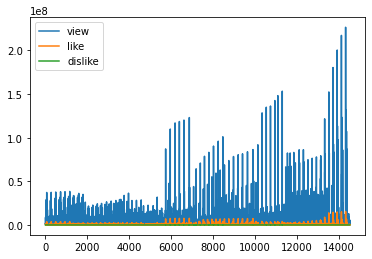

In [73]:
df_summary.plot()